c:\Users\Aspire_Lays\anaconda3\envs\ai\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Logistic Regression Accuracy: 91.29%
KNN Accuracy: 94.30%
Random Forest Accuracy: 96.68%
SVM Accuracy: 92.00%


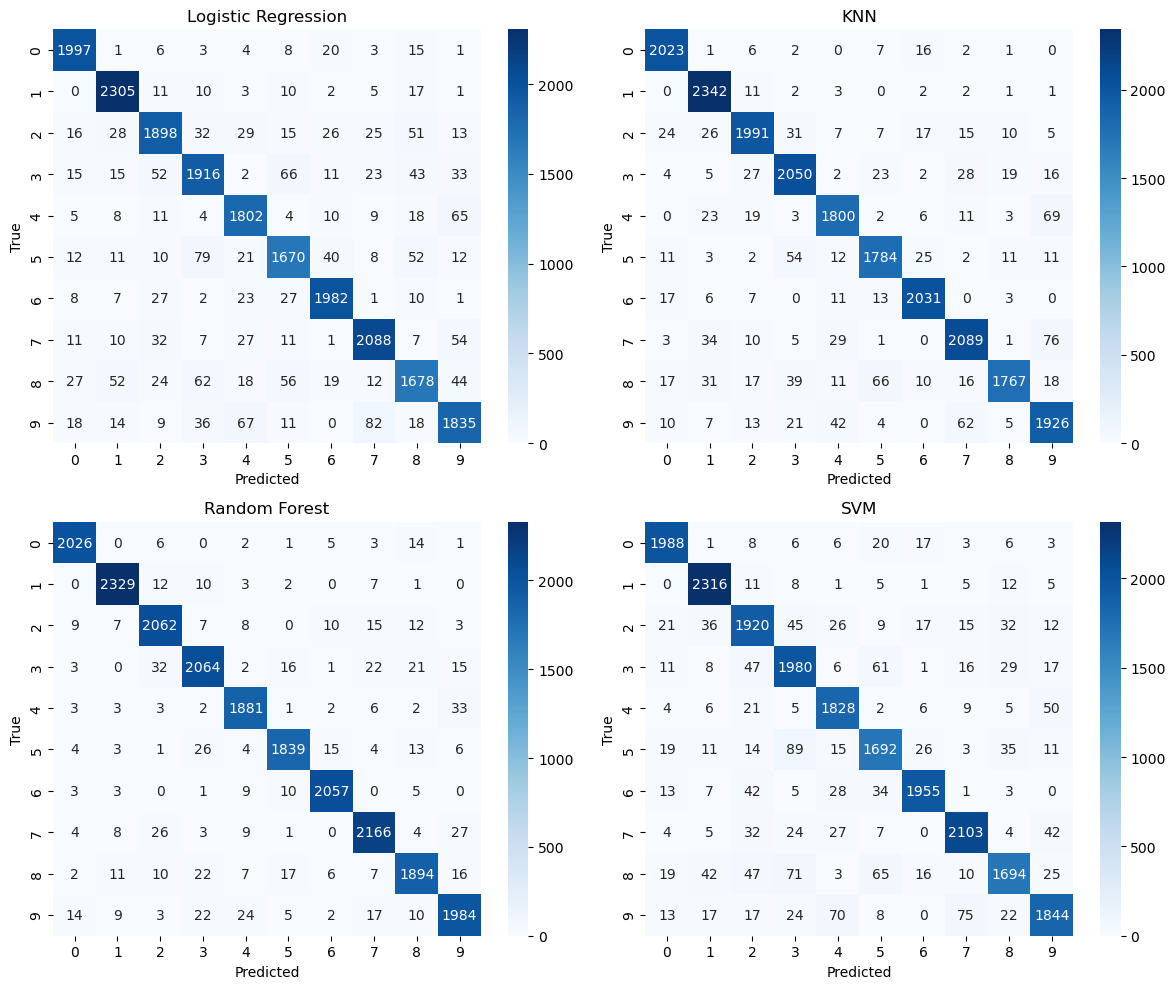

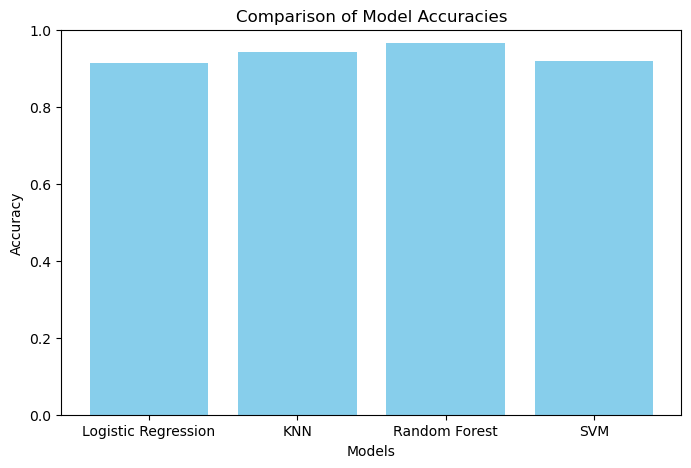

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the MNIST-784 dataset using fetch_openml
mnist = datasets.fetch_openml("mnist_784", version=1)

# Extract the features (X) and target labels (y)
X = mnist.data
y = mnist.target.astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for models that require it (Logistic Regression, KNN, SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [2]:

# Initialize the models
logistic_regressor = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='ovr')
knn_classifier = KNeighborsClassifier(n_neighbors=5)
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(kernel='rbf', gamma='scale')



Logistic Regression Accuracy: 91.29%
KNN Accuracy: 94.30%
Random Forest Accuracy: 96.68%
SVM Accuracy: 96.23%


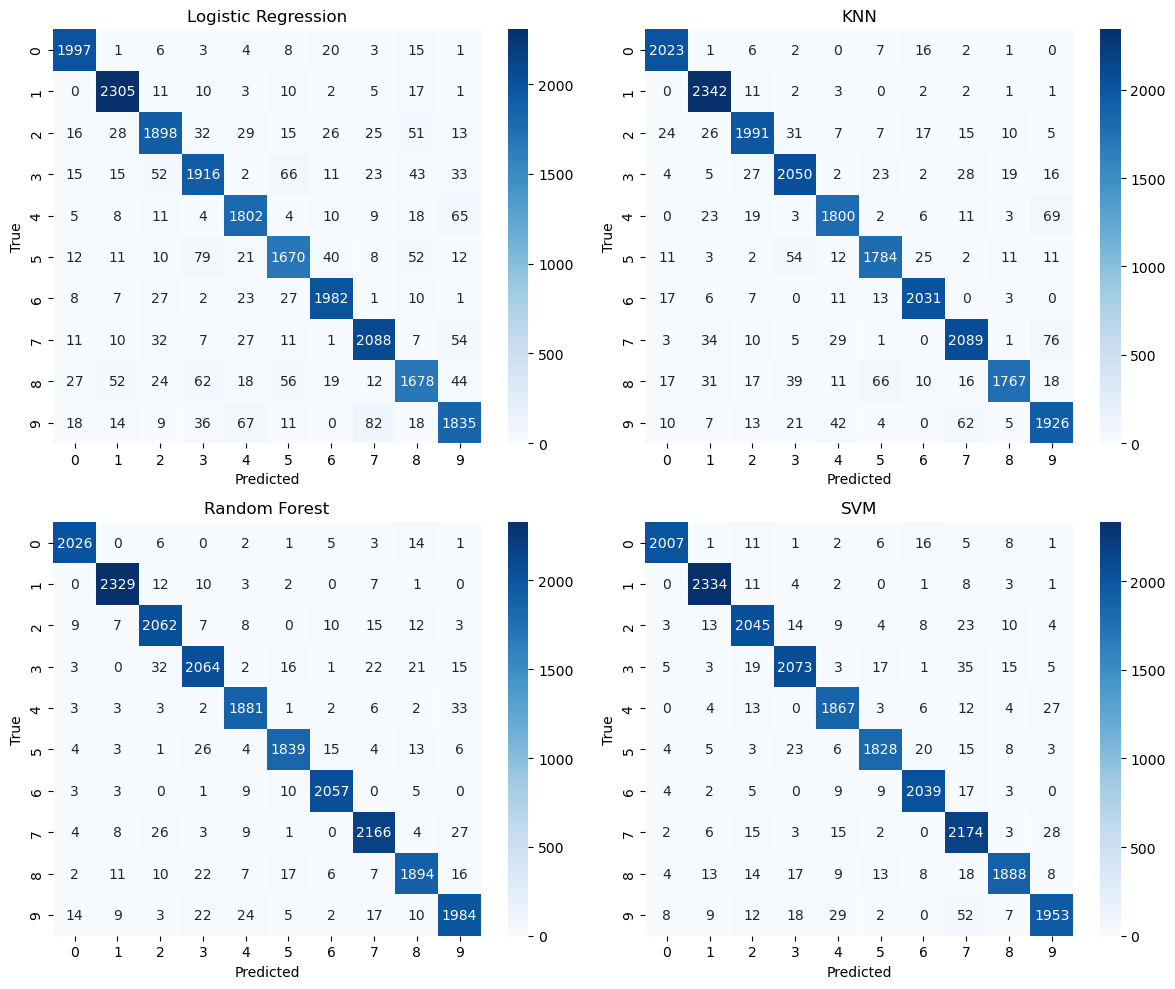

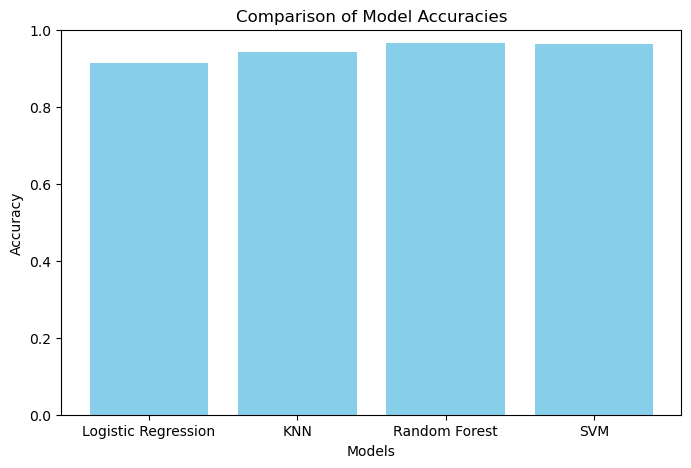

In [4]:

# Train and evaluate Logistic Regression
logistic_regressor.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_regressor.predict(X_test_scaled)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Train and evaluate KNN
knn_classifier.fit(X_train_scaled, y_train)
y_pred_knn = knn_classifier.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Train and evaluate Random Forest
random_forest_classifier.fit(X_train, y_train)  # No scaling needed for Random Forest
y_pred_forest = random_forest_classifier.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)

# Train and evaluate SVM
svm_classifier.fit(X_train_scaled, y_train)
y_pred_svm = svm_classifier.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print the accuracies
print(f"Logistic Regression Accuracy: {accuracy_logistic * 100:.2f}%")
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_forest * 100:.2f}%")
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Confusion matrices
conf_matrices = [
    ("Logistic Regression", confusion_matrix(y_test, y_pred_logistic)),
    ("KNN", confusion_matrix(y_test, y_pred_knn)),
    ("Random Forest", confusion_matrix(y_test, y_pred_forest)),
    ("SVM", confusion_matrix(y_test, y_pred_svm))
]

# Visualize the confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (title, conf_matrix) in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

# Visualize the accuracy comparison
model_names = ["Logistic Regression", "KNN", "Random Forest", "SVM"]
accuracies = [accuracy_logistic, accuracy_knn, accuracy_forest, accuracy_svm]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)
plt.show()

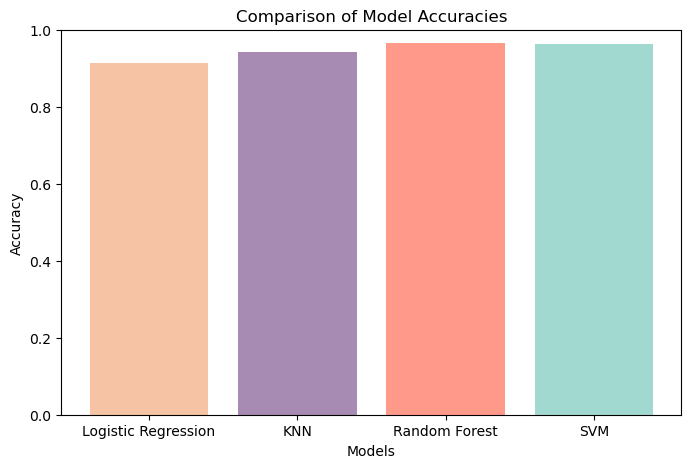

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the accuracy comparison
model_names = ["Logistic Regression", "KNN", "Random Forest", "SVM"]
#accuracies = [accuracy_logistic, accuracy_knn, accuracy_forest, accuracy_svm]
accuracies = [0.9129,0.9430,.9668,.9623]
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color= ["#F6C4A4", "#A78BB3", "#FF9A8B", "#A1D9D1"])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)
plt.show()